# Bank Marketing Dataset

## Introduction

Dengan menggunakan data Marketing Campaign dari Portugese Banking Institution, kita akan membuat model yang dapat memprediksi apakah client akan menerima atau menolak tawaran deposito yang diberikan.

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


## Load and Review Data

In [2]:
df_bank = pd.read_csv('E:\Cool Yeah\Hacktiv8\\Bank\Data\\bank-additional-full.csv', delimiter=';')

In [3]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df_bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
df_bank.shape

(41188, 21)

In [6]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Data Cleanup

In [3]:
clean_df = df_bank.drop(['campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)

In [4]:
clean_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'y'],
      dtype='object')

In [10]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  duration     41188 non-null  int64 
 11  y            41188 non-null  object
dtypes: int64(2), object(10)
memory usage: 3.8+ MB


In [6]:
clean_df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
y              0
dtype: int64

In [6]:
# le = preprocessing.LabelEncoder()

In [7]:
# clean_df.job = le.fit_transform(clean_df.job)
# clean_df.marital = le.fit_transform(clean_df.marital)
# clean_df.education = le.fit_transform(clean_df.education)
# clean_df.default = le.fit_transform(clean_df.default)
# clean_df.housing = le.fit_transform(clean_df.housing)
# clean_df.loan = le.fit_transform(clean_df.loan)
# clean_df.contact = le.fit_transform(clean_df.contact)
# clean_df.month = le.fit_transform(clean_df.month)
# clean_df.day_of_week = le.fit_transform(clean_df.day_of_week)
# clean_df.y = le.fit_transform(clean_df.y)


In [7]:
clean_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,no


In [8]:
clean_df.job.replace({'unknown': 0, 'admin.': 1,'blue-collar': 2,'entrepreneur': 3,'housemaid': 4,'management': 5,'retired': 6,'self-employed': 7,'services': 8,'student': 9,'technician': 10,'unemployed': 11}, inplace=True)
clean_df.marital.replace({'unknown': 0, 'divorced': 1,'married': 2,'single': 3}, inplace=True)
clean_df.education.replace({'unknown': 0, 'basic.4y': 1,'basic.6y': 2,'basic.9y': 3,'high.school': 4,'illiterate': 5,'professional.course': 6,'university.degree': 7}, inplace=True)
clean_df.default.replace({'unknown': 0, 'no': 0, 'yes': 1}, inplace=True)
clean_df.housing.replace({'unknown': 0, 'no': 0, 'yes': 1}, inplace=True)
clean_df.loan.replace({'unknown': 0, 'no': 0, 'yes': 1}, inplace=True)
clean_df.contact.replace({'cellular': 1,'telephone': 2}, inplace=True)
clean_df.month.replace({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}, inplace=True)
clean_df.day_of_week.replace({'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}, inplace=True)
clean_df.y.replace({'no': 0, 'yes': 1}, inplace=True)

In [9]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          41188 non-null  int64
 1   job          41188 non-null  int64
 2   marital      41188 non-null  int64
 3   education    41188 non-null  int64
 4   default      41188 non-null  int64
 5   housing      41188 non-null  int64
 6   loan         41188 non-null  int64
 7   contact      41188 non-null  int64
 8   month        41188 non-null  int64
 9   day_of_week  41188 non-null  int64
 10  duration     41188 non-null  int64
 11  y            41188 non-null  int64
dtypes: int64(12)
memory usage: 3.8 MB


In [10]:
clean_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,y
0,56,4,2,1,0,0,0,2,5,1,261,0
1,57,8,2,4,0,0,0,2,5,1,149,0
2,37,8,2,4,0,1,0,2,5,1,226,0
3,40,1,2,2,0,0,0,2,5,1,151,0
4,56,8,2,4,0,0,1,2,5,1,307,0


## Training Model

In [93]:
# x = np.array(clean_df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration']])

In [9]:
# x

array([[ 56,   3,   1, ...,   6,   1, 261],
       [ 57,   7,   1, ...,   6,   1, 149],
       [ 37,   7,   1, ...,   6,   1, 226],
       ...,
       [ 56,   5,   1, ...,   7,   0, 189],
       [ 44,   9,   1, ...,   7,   0, 442],
       [ 74,   5,   1, ...,   7,   0, 239]], dtype=int64)

In [94]:
# y = np.array(clean_df['y'])

In [20]:
# y

array([0, 0, 0, ..., 0, 1, 0])

In [13]:
x = clean_df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration']]
y = clean_df['y']

In [12]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration
0,56,4,2,1,0,0,0,2,5,1,261
1,57,8,2,4,0,0,0,2,5,1,149
2,37,8,2,4,0,1,0,2,5,1,226
3,40,1,2,2,0,0,0,2,5,1,151
4,56,8,2,4,0,0,1,2,5,1,307


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

### Split Data

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [16]:
print("Jumlah Original Berlangganan Deposit : ", len(y[y == 1]))
print("Jumlah Original Tidak Berlangganan Deposit : ", len(y[y == 0]))

print("Training True : ", len(y_train[y_train == 1]))
print("Training False : ", len(y_train[y_train == 0]))

print("Testing True : ", len(y_test[y_test == 1]))
print("Testing False : ", len(y_test[y_test == 0]))

Jumlah Original Berlangganan Deposit :  4640
Jumlah Original Tidak Berlangganan Deposit :  36548
Training True :  3743
Training False :  29207
Testing True :  897
Testing False :  7341


### Create a Model and Train It

#### Logistic Regression

In [18]:
lr_model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)

In [19]:
lr_model.score(x_train, y_train)

0.8941729893778452

In [20]:
lr_model.score(x_test, y_test)

0.894634620053411

In [21]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_pred)))
print(metrics.confusion_matrix(y_test, lr_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_pred))
print(metrics.recall_score(y_test, lr_pred))

Accuracy: 0.8946
[[7209  132]
 [ 736  161]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7341
           1       0.55      0.18      0.27       897

    accuracy                           0.89      8238
   macro avg       0.73      0.58      0.61      8238
weighted avg       0.87      0.89      0.87      8238

0.1794871794871795


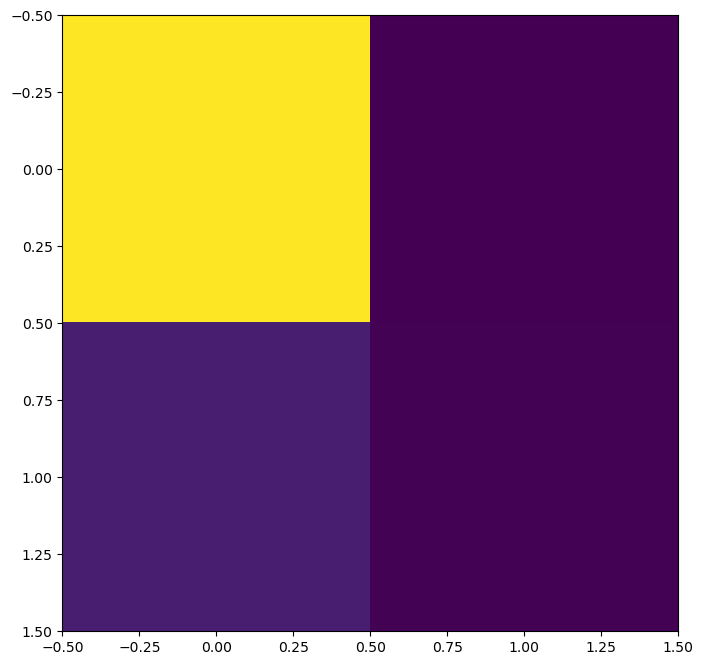

In [22]:
cm = metrics.confusion_matrix(y_test, lr_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
plt.show()

#### K-Nearest Neighbor

In [40]:
knn_model = KNeighborsClassifier()
knn.fit(x_train, y_train)

knn_pred = knn.predict(x_test)

D:\Application\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, knn_pred)))
print(metrics.confusion_matrix(y_test, knn_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, knn_pred))

Accuracy: 0.8945
[[7183  158]
 [ 711  186]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7341
           1       0.54      0.21      0.30       897

    accuracy                           0.89      8238
   macro avg       0.73      0.59      0.62      8238
weighted avg       0.87      0.89      0.87      8238



#### Support Vector Machine

In [43]:
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)

In [44]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, svm_pred)))
print(metrics.confusion_matrix(y_test, svm_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, svm_pred))

Accuracy: 0.8940
[[7213  128]
 [ 745  152]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7341
           1       0.54      0.17      0.26       897

    accuracy                           0.89      8238
   macro avg       0.72      0.58      0.60      8238
weighted avg       0.87      0.89      0.87      8238



#### Decision Tree

In [46]:
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

In [47]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, dt_pred)))
print(metrics.confusion_matrix(y_test, dt_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, dt_pred))
print(metrics.recall_score(y_test, dt_pred))

Accuracy: 0.8656
[[6736  605]
 [ 502  395]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7341
           1       0.40      0.44      0.42       897

    accuracy                           0.87      8238
   macro avg       0.66      0.68      0.67      8238
weighted avg       0.87      0.87      0.87      8238

0.4403567447045708


#### Random Forest

In [49]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train.ravel())
rf_pred = rf_model.predict(x_test)

In [50]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_pred)))
print(metrics.confusion_matrix(y_test, rf_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_pred))
print(metrics.recall_score(y_test, rf_pred))

Accuracy: 0.8999
[[7112  229]
 [ 596  301]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7341
           1       0.57      0.34      0.42       897

    accuracy                           0.90      8238
   macro avg       0.75      0.65      0.68      8238
weighted avg       0.88      0.90      0.89      8238

0.3355629877369008


In [18]:
clean_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'y'],
      dtype='object')

In [51]:
# index = clean_df.drop(['y'], axis=1)

In [68]:
# feature_imp = pd.Series(rf_model.feature_importances_, index=index.columns).sort_values(ascending=False)
# feature_imp

duration       0.382560
age            0.177064
month          0.132693
job            0.068180
education      0.062381
day_of_week    0.060697
marital        0.031743
housing        0.030525
contact        0.022710
loan           0.020311
default        0.011137
dtype: float64

#### Naive Bayes

In [53]:
gnb = GaussianNB()

gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)

In [54]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, gnb_pred)))
print(metrics.confusion_matrix(y_test, gnb_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, gnb_pred))
print(metrics.recall_score(y_test, gnb_pred))

Accuracy: 0.8906
[[7025  316]
 [ 585  312]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7341
           1       0.50      0.35      0.41       897

    accuracy                           0.89      8238
   macro avg       0.71      0.65      0.67      8238
weighted avg       0.88      0.89      0.88      8238

0.34782608695652173


### Accuracy Score

In [56]:
print("Logistic Regression: ", metrics.accuracy_score(y_test, lr_pred))
print("K-Nearest Neighbors: ", metrics.accuracy_score(y_test, knn_pred))
print("Support Vector Machine: ", metrics.accuracy_score(y_test, svm_pred))
print("Decision Tree: ", metrics.accuracy_score(y_test, dt_pred))
print("Random Forest: ", metrics.accuracy_score(y_test, rf_pred))
print("Naive Bayes: ", metrics.accuracy_score(y_test, gnb_pred))

Logistic Regression:  0.894634620053411
K-Nearest Neighbors:  0.8945132313668366
Support Vector Machine:  0.894027676620539
Decision Tree:  0.8656227239621267
Random Forest:  0.8998543335761107
Naive Bayes:  0.8906287933964554


## Peningkatan Peforma

1st max value of 0.707 occured at C=0.100
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at C=0.200
1st max value of 0.709 occured at 

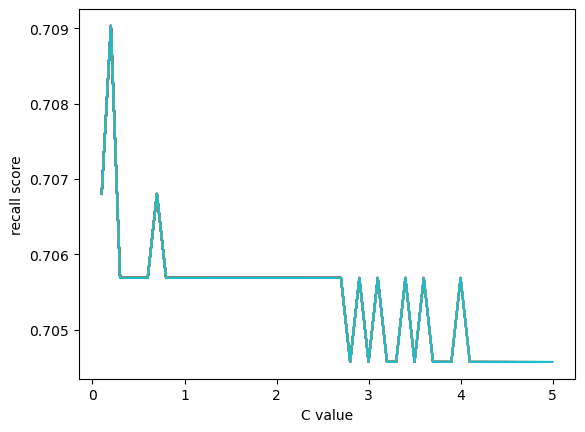

In [57]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test

    C_val = C_val + C_inc

    best_score_C_val = C_values[recall_scores.index(best_recall_score)]
    print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score,best_score_C_val))

    plt.plot(C_values, recall_scores, "-")
    plt.xlabel("C value")
    plt.ylabel("recall score")

In [58]:
lr_model = LogisticRegression(class_weight="balanced", C=best_score_C_val, random_state=42, solver='liblinear')
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7972
[[5931 1410]
 [ 261  636]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      7341
           1       0.31      0.71      0.43       897

    accuracy                           0.80      8238
   macro avg       0.63      0.76      0.65      8238
weighted avg       0.89      0.80      0.83      8238

0.7090301003344481
